## Import libraries

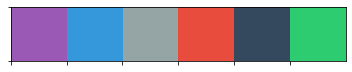

In [1]:
# Toolbox
import pandas as pd
import numpy as np
import random
import sys
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Statistics
from scipy.stats import norm

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Misc
import os
import warnings
warnings.filterwarnings(action='ignore')

# Preset data display
pd.options.display.max_seq_items = 1000
pd.options.display.max_rows =1000
pd.set_option('display.max_columns', 50)

# Set notebook colors and palette
flatui = ['#9b59b6', '#3498db', '#95a5a6', '#e74c3c', '#34495e', '#2ecc71']
sns.set_palette(flatui)
sns.palplot(sns.color_palette(flatui))
sns.set_style('white')
sns.set_color_codes(palette='deep')
# Favorite code to use: #34995e

In [2]:
import tensorflow as tf
import tensorflow.keras
import keras

print('These are the current versions working for me as of 2019-08-04')
print(f"TensorFlow Version: {tf.__version__}")
print(f"TensorFlow Keras Version: {tensorflow.keras.__version__}")
print(f"Keras Version: {keras.__version__}")
print()
print("TensorFlow-GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")
print(f"TensorFlow CUDA: {tf.test.is_built_with_cuda()}")
print(f"Tensorflow GPU Device Currently Activated: {tf.test.gpu_device_name()}")
print(f"Keras GPU: {keras.backend.tensorflow_backend._get_available_gpus()}")
print()
print(f"TF Session: {tf.Session()}")
print()
print(f"Python {sys.version}")

Using TensorFlow backend.


These are the current versions working for me as of 2019-08-04
TensorFlow Version: 1.13.1
TensorFlow Keras Version: 2.2.4-tf
Keras Version: 2.2.4

TensorFlow-GPU is available
TensorFlow CUDA: True
Tensorflow GPU Device Currently Activated: /device:GPU:0
Keras GPU: ['/job:localhost/replica:0/task:0/device:GPU:0']

TF Session: <tensorflow.python.client.session.Session object at 0x000001B242DC05F8>

Python 3.6.8 |Anaconda, Inc.| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]


### Define functions

In [3]:
def pct_bar_labels():
    '''
    Function used to label the relative frequency on top of each bars
    '''
    # Set font size
    fs=15
    
    # Set plot label and ticks
    plt.ylabel('Relative Frequency (%)', fontsize=fs)
    plt.xticks(rotation=0, fontsize=fs)
    plt.yticks([])
    
    # Set individual bar labels in proportional scale
    for x in ax1.patches:
        ax1.annotate(str(x.get_height()) + '%', 
        (x.get_x() + x.get_width()/2., x.get_height()), ha='center', va='center', xytext=(0, 7), 
        textcoords='offset points', fontsize=fs, color='black')

def freq_table(var):
    '''
    Define plot global variables
    Create a function that will populate a frequency table (%)
    Get counts per feature then get the percentage over the total counts
    '''
    global ax, ax1
    
    # Get Values and pct and combine it into a dataframe
    count_freq = var.value_counts()
    pct_freq = round(var.value_counts(normalize=True)*100, 2)
    
    # Create a dataframe
    df = pd.DataFrame({'Count': count_freq, 'Percentage': pct_freq})
    
    # Print variable name
    print('Frequency of', var.name, ':')
    display(df)
    
    # Create plot
    ax1 = pct_freq.plot.bar(title='Percentage of {}'.format(var.name), figsize=(12,8))
    ax1.title.set_size(15)
    pct_bar_labels()
    plt.show()
    
# Define a null function
def get_nulls(df):
    
    # Get null pct and counts
    null_cols = pd.DataFrame(df.isnull().sum().sort_values(ascending=False), columns=['Null Data Count'])
    null_cols_pct = pd.DataFrame(round(df.isnull().sum().sort_values(ascending=False)/len(df),2), columns=['Null Data Pct'])

    # Combine dataframes horizontally
    null_cols_df = pd.DataFrame(pd.concat([null_cols, null_cols_pct], axis=1))

    all_nulls = null_cols_df[null_cols_df['Null Data Pct']>0]

    # Print
    print('There are', len(all_nulls), 'columns with missing values.')
    return all_nulls

## Load data

In [4]:
# Set directory
PATH = 'C:\\Users\\' + os.getlogin() + '\\Documents\\Programming\\Python\\MachineLearning\\Data'
os.chdir(PATH)
os.getcwd()
os.listdir()

['01-ign.csv',
 '02-winequality-red.csv',
 '02-winequality-white.csv',
 '03-thanksgiving-2015-poll-data.csv',
 '05-ibm-sales-loss.csv',
 '07-test.csv',
 '07-train.csv',
 '09-house-regression-env.db',
 '09-house-test.csv',
 '09-house-train.csv',
 '10-vgsales.csv',
 '11-diabetes.csv',
 '13-facebook-likes.csv',
 '15-google-review-ratings.csv',
 '16-mnist-test.csv',
 '16-mnist-train.csv',
 '17-real-estate-valuation.csv',
 '18-credit-card-defaults.csv',
 'README.md']

In [5]:
train = pd.read_csv('09-house-train.csv')
test = pd.read_csv('09-house-test.csv')

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,...,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,...,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,...,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,...,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,...,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,...,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,...,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,...,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,...,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,...,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,...,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,...,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
train.shape

(1460, 81)

In [9]:
test.shape

(1459, 80)

In [10]:
get_nulls(train)

There are 18 columns with missing values.


,Null Data Count,Null Data Pct
PoolQC,1453,1.00
MiscFeature,1406,0.96
Alley,1369,0.94
Fence,1179,0.81
FireplaceQu,690,0.47
LotFrontage,259,0.18
GarageCond,81,0.06
GarageType,81,0.06
GarageYrBlt,81,0.06
GarageFinish,81,0.06


In [11]:
get_nulls(test)

There are 18 columns with missing values.


,Null Data Count,Null Data Pct
PoolQC,1456,1.00
MiscFeature,1408,0.97
Alley,1352,0.93
Fence,1169,0.80
FireplaceQu,730,0.50
LotFrontage,227,0.16
GarageCond,78,0.05
GarageQual,78,0.05
GarageYrBlt,78,0.05
GarageFinish,78,0.05


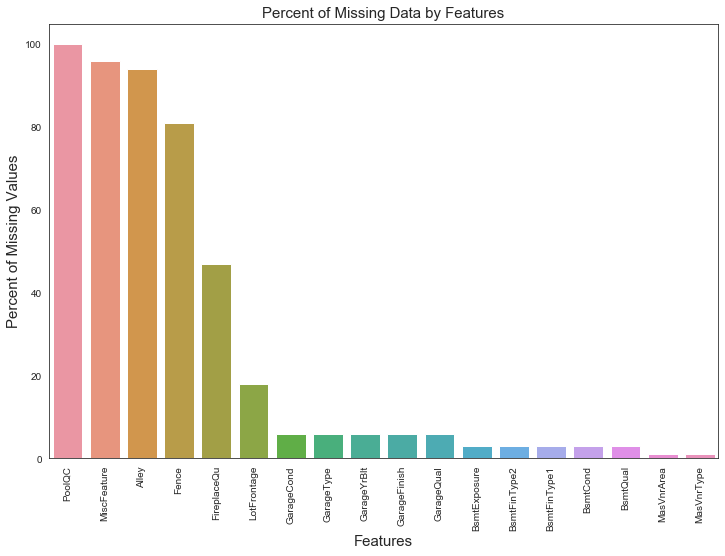

In [12]:
# Get null pct and counts
null_cols = pd.DataFrame(train.isnull().sum().sort_values(ascending=False), columns=['Null Data Count'])
null_cols_pct = pd.DataFrame(round(train.isnull().sum().sort_values(ascending=False)/len(train),2)*100, columns=['Null Data %'])

# Combine horizontally (axis=1) into a dataframe with column names (keys=[]) then to a data frame
null_cols_df = pd.DataFrame(pd.concat([null_cols, null_cols_pct], axis=1))

all_nulls = null_cols_df[null_cols_df['Null Data %']>0]

# Create figure space
plt.figure(figsize=(12, 8))

# Create plot
sns.barplot(x=all_nulls.index,
            y='Null Data %',
            data=all_nulls)

# Set plot features
plt.xticks(rotation='90')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of Missing Values', fontsize=15)
plt.title('Percent of Missing Data by Features', fontsize=15)
plt.show()

In [13]:
# Top 4 features with missing values
train = train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'Id'], axis=1)
test = test.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'Id'], axis=1)

It's easier to fill in the missing data when the features are split by numerical and categorical.

In [14]:
# Find numeric features
num_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
cat_dtypes = ['object']

# Train
train_num = train.select_dtypes(exclude=['object'])
train_cat = train.select_dtypes(include=['object'])

# Test
test_num = test.select_dtypes(exclude=['object'])
test_cat = test.select_dtypes(include=['object'])

In [15]:
# Fill missing data
train_num.fillna(0, inplace=True)
train_cat.fillna('NONE', inplace=True)
test_num.fillna(0, inplace=True)
test_cat.fillna('NONE', inplace=True)

In [16]:
# Get dummies (.reset_index(drop=True))
train_cat = pd.get_dummies(train_cat, dummy_na=False, sparse=True)
test_cat = pd.get_dummies(test_cat, dummy_na=False, sparse=True)

In [17]:
# Get output
output = train_num[['SalePrice']]
train_num = train_num.drop('SalePrice', axis=1)

In [18]:
# Normalize the data
train_num_cols = list(train_num.columns)
test_num_cols = list(test_num.columns)

train_num_val = train_num.values
test_num_val = test_num.values

# Scaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_num_val)
test_scaled = scaler.transform(test_num_val)

# Create dataframe again for train / test
train_num = pd.DataFrame(train_scaled, columns=train_num_cols)
test_num = pd.DataFrame(test_scaled, columns=test_num_cols)

In [19]:
# Merge the data back togther
train = pd.merge(train_num, train_cat, left_index=True, right_index=True)
test = pd.merge(test_num, test_cat, left_index=True, right_index=True)

Now we don't want to use any columns that will cause us errors while training and testing so we need to remove any columns that do not appear in both. I would definitely want to spend some time looking at which features to remove, but we will make it simple for now.

In [20]:
# Loop through columns
for col in train.columns:
    if col not in test.columns:
        train = train.drop([col], axis=1)

for col in test.columns:
    if col not in train.columns:
        test = test.drop([col], axis=1)

In [21]:
# Reindex (sort by column name)
train = train.reindex(sorted(train.columns), axis=1)
test = test.reindex(sorted(test.columns), axis=1)

In [22]:
# Split the data into training and validation sets
train_array = train.values # need an array for keras

X_train, X_val, y_train, y_val = train_test_split(train_array, output, test_size=0.20, random_state=100)

In [23]:
# Define model parameters
BATCH_SIZE = 100
EPOCHS = 1000

# Build the neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1024, activation=tf.nn.leaky_relu, input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation=tf.nn.leaky_relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation=tf.nn.leaky_relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation=tf.nn.leaky_relu),
    tf.keras.layers.Dense(1)
])

# Optimizer
optimizer = tf.keras.optimizers.Adam(0.001)

# Compile the model
model.compile(loss='mean_squared_logarithmic_error',
              optimizer=optimizer,
              metrics=['mean_squared_logarithmic_error'])

# Model summary
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              277504    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)  

tf.nn.leaky_relu

    https://ai.stanford.edu/%7Eamaas/papers/relu_hybrid_icml2013_final.pdf
    
    https://www.tensorflow.org/api_docs/python/tf/nn/leaky_relu

In [24]:
# Define callback if there's no improvement
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_mean_squared_logarithmic_error', patience=20)

In [25]:
# Train the model
keras_model = model.fit(X_train,
                        y_train,
                        batch_size=BATCH_SIZE,
                        epochs=EPOCHS,
                        steps_per_epoch=X_train.shape[0] // 100, # ???
                        callbacks=[early_stop],
                        validation_data=(X_val, y_val)
                        )

Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
11/11 [==============================] - 1s 49ms/step - loss: 85.7385 - mean_squared_logarithmic_error: 85.7385 - val_loss: 46.3930 - val_mean_squared_logarithmic_error: 46.3930
Epoch 2/1000
11/11 [==============================] - 0s 12ms/step - loss: 33.2148 - mean_squared_logarithmic_error: 33.2148 - val_loss: 22.1903 - val_mean_squared_logarithmic_error: 22.1903
Epoch 3/1000
11/11 [==============================] - 0s 12ms/step - loss: 17.3274 - mean_squared_logarithmic_error: 17.3274 - val_loss: 12.8887 - val_mean_squared_logarithmic_error: 12.8887
Epoch 4/1000
11/11 [==============================] - 0s 12ms/step - loss: 10.5620 - mean_squared_logarithmic_error: 10.5620 - val_loss: 8.3341 - val_mean_squared_logarithmic_error: 8.3341
Epoch 5/1000
11/11 [==============================] - 0s 12ms/step - loss: 7.0289 - mean_squared_logarithmic_error: 7.0289 - val_loss: 5.7291 - val_mean_squared_logarithmic_error: 5.7291
Epo

11/11 [==============================] - 0s 12ms/step - loss: 0.1030 - mean_squared_logarithmic_error: 0.1030 - val_loss: 0.1115 - val_mean_squared_logarithmic_error: 0.1115
Epoch 44/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.1021 - mean_squared_logarithmic_error: 0.1021 - val_loss: 0.1105 - val_mean_squared_logarithmic_error: 0.1105
Epoch 45/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.1005 - mean_squared_logarithmic_error: 0.1005 - val_loss: 0.1094 - val_mean_squared_logarithmic_error: 0.1094
Epoch 46/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.0994 - mean_squared_logarithmic_error: 0.0994 - val_loss: 0.1083 - val_mean_squared_logarithmic_error: 0.1083
Epoch 47/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.0987 - mean_squared_logarithmic_error: 0.0987 - val_loss: 0.1071 - val_mean_squared_logarithmic_error: 0.1071
Epoch 48/1000
11/11 [==============================] - 0s 12ms/step - loss

Epoch 87/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.0590 - mean_squared_logarithmic_error: 0.0590 - val_loss: 0.0666 - val_mean_squared_logarithmic_error: 0.0666
Epoch 88/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.0583 - mean_squared_logarithmic_error: 0.0583 - val_loss: 0.0659 - val_mean_squared_logarithmic_error: 0.0659
Epoch 89/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.0575 - mean_squared_logarithmic_error: 0.0575 - val_loss: 0.0651 - val_mean_squared_logarithmic_error: 0.0651
Epoch 90/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.0572 - mean_squared_logarithmic_error: 0.0572 - val_loss: 0.0643 - val_mean_squared_logarithmic_error: 0.0643
Epoch 91/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.0568 - mean_squared_logarithmic_error: 0.0568 - val_loss: 0.0636 - val_mean_squared_logarithmic_error: 0.0636
Epoch 92/1000
11/11 [==============================] - 0s 12

11/11 [==============================] - 0s 12ms/step - loss: 0.0394 - mean_squared_logarithmic_error: 0.0394 - val_loss: 0.0451 - val_mean_squared_logarithmic_error: 0.0451
Epoch 131/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.0394 - mean_squared_logarithmic_error: 0.0394 - val_loss: 0.0448 - val_mean_squared_logarithmic_error: 0.0448
Epoch 132/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.0390 - mean_squared_logarithmic_error: 0.0390 - val_loss: 0.0445 - val_mean_squared_logarithmic_error: 0.0445
Epoch 133/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.0385 - mean_squared_logarithmic_error: 0.0385 - val_loss: 0.0442 - val_mean_squared_logarithmic_error: 0.0442
Epoch 134/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.0385 - mean_squared_logarithmic_error: 0.0385 - val_loss: 0.0439 - val_mean_squared_logarithmic_error: 0.0439
Epoch 135/1000
11/11 [==============================] - 0s 12ms/step -

11/11 [==============================] - 0s 12ms/step - loss: 0.0309 - mean_squared_logarithmic_error: 0.0309 - val_loss: 0.0357 - val_mean_squared_logarithmic_error: 0.0357
Epoch 174/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.0308 - mean_squared_logarithmic_error: 0.0308 - val_loss: 0.0356 - val_mean_squared_logarithmic_error: 0.0356
Epoch 175/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.0309 - mean_squared_logarithmic_error: 0.0309 - val_loss: 0.0354 - val_mean_squared_logarithmic_error: 0.0354
Epoch 176/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.0304 - mean_squared_logarithmic_error: 0.0304 - val_loss: 0.0352 - val_mean_squared_logarithmic_error: 0.0352
Epoch 177/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.0305 - mean_squared_logarithmic_error: 0.0305 - val_loss: 0.0350 - val_mean_squared_logarithmic_error: 0.0350
Epoch 178/1000
11/11 [==============================] - 0s 12ms/step -

11/11 [==============================] - 0s 12ms/step - loss: 0.0258 - mean_squared_logarithmic_error: 0.0258 - val_loss: 0.0298 - val_mean_squared_logarithmic_error: 0.0298
Epoch 217/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.0257 - mean_squared_logarithmic_error: 0.0257 - val_loss: 0.0297 - val_mean_squared_logarithmic_error: 0.0297
Epoch 218/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.0256 - mean_squared_logarithmic_error: 0.0256 - val_loss: 0.0296 - val_mean_squared_logarithmic_error: 0.0296
Epoch 219/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.0255 - mean_squared_logarithmic_error: 0.0255 - val_loss: 0.0295 - val_mean_squared_logarithmic_error: 0.0295
Epoch 220/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.0257 - mean_squared_logarithmic_error: 0.0257 - val_loss: 0.0294 - val_mean_squared_logarithmic_error: 0.0294
Epoch 221/1000
11/11 [==============================] - 0s 12ms/step -

11/11 [==============================] - 0s 12ms/step - loss: 0.0227 - mean_squared_logarithmic_error: 0.0227 - val_loss: 0.0264 - val_mean_squared_logarithmic_error: 0.0264
Epoch 260/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.0226 - mean_squared_logarithmic_error: 0.0226 - val_loss: 0.0263 - val_mean_squared_logarithmic_error: 0.0263
Epoch 261/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.0225 - mean_squared_logarithmic_error: 0.0225 - val_loss: 0.0263 - val_mean_squared_logarithmic_error: 0.0263
Epoch 262/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.0225 - mean_squared_logarithmic_error: 0.0225 - val_loss: 0.0262 - val_mean_squared_logarithmic_error: 0.0262
Epoch 263/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.0225 - mean_squared_logarithmic_error: 0.0225 - val_loss: 0.0262 - val_mean_squared_logarithmic_error: 0.0262
Epoch 264/1000
11/11 [==============================] - 0s 11ms/step -

11/11 [==============================] - 0s 11ms/step - loss: 0.0205 - mean_squared_logarithmic_error: 0.0205 - val_loss: 0.0245 - val_mean_squared_logarithmic_error: 0.0245
Epoch 303/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.0206 - mean_squared_logarithmic_error: 0.0206 - val_loss: 0.0245 - val_mean_squared_logarithmic_error: 0.0245
Epoch 304/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.0205 - mean_squared_logarithmic_error: 0.0205 - val_loss: 0.0245 - val_mean_squared_logarithmic_error: 0.0245
Epoch 305/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.0204 - mean_squared_logarithmic_error: 0.0204 - val_loss: 0.0244 - val_mean_squared_logarithmic_error: 0.0244
Epoch 306/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.0205 - mean_squared_logarithmic_error: 0.0205 - val_loss: 0.0244 - val_mean_squared_logarithmic_error: 0.0244
Epoch 307/1000
11/11 [==============================] - 0s 11ms/step -

11/11 [==============================] - 0s 12ms/step - loss: 0.0193 - mean_squared_logarithmic_error: 0.0193 - val_loss: 0.0235 - val_mean_squared_logarithmic_error: 0.0235
Epoch 346/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.0192 - mean_squared_logarithmic_error: 0.0192 - val_loss: 0.0235 - val_mean_squared_logarithmic_error: 0.0235
Epoch 347/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.0191 - mean_squared_logarithmic_error: 0.0191 - val_loss: 0.0234 - val_mean_squared_logarithmic_error: 0.0234
Epoch 348/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.0193 - mean_squared_logarithmic_error: 0.0193 - val_loss: 0.0234 - val_mean_squared_logarithmic_error: 0.0234
Epoch 349/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.0190 - mean_squared_logarithmic_error: 0.0190 - val_loss: 0.0234 - val_mean_squared_logarithmic_error: 0.0234
Epoch 350/1000
11/11 [==============================] - 0s 12ms/step -

11/11 [==============================] - 0s 12ms/step - loss: 0.0178 - mean_squared_logarithmic_error: 0.0178 - val_loss: 0.0227 - val_mean_squared_logarithmic_error: 0.0227
Epoch 389/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.0179 - mean_squared_logarithmic_error: 0.0179 - val_loss: 0.0227 - val_mean_squared_logarithmic_error: 0.0227
Epoch 390/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.0179 - mean_squared_logarithmic_error: 0.0179 - val_loss: 0.0227 - val_mean_squared_logarithmic_error: 0.0227
Epoch 391/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.0182 - mean_squared_logarithmic_error: 0.0182 - val_loss: 0.0227 - val_mean_squared_logarithmic_error: 0.0227
Epoch 392/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.0177 - mean_squared_logarithmic_error: 0.0177 - val_loss: 0.0227 - val_mean_squared_logarithmic_error: 0.0227
Epoch 393/1000
11/11 [==============================] - 0s 12ms/step -

11/11 [==============================] - 0s 12ms/step - loss: 0.0168 - mean_squared_logarithmic_error: 0.0168 - val_loss: 0.0221 - val_mean_squared_logarithmic_error: 0.0221
Epoch 432/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.0165 - mean_squared_logarithmic_error: 0.0165 - val_loss: 0.0221 - val_mean_squared_logarithmic_error: 0.0221
Epoch 433/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.0166 - mean_squared_logarithmic_error: 0.0166 - val_loss: 0.0221 - val_mean_squared_logarithmic_error: 0.0221
Epoch 434/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.0165 - mean_squared_logarithmic_error: 0.0165 - val_loss: 0.0221 - val_mean_squared_logarithmic_error: 0.0221
Epoch 435/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.0164 - mean_squared_logarithmic_error: 0.0164 - val_loss: 0.0221 - val_mean_squared_logarithmic_error: 0.0221
Epoch 436/1000
11/11 [==============================] - 0s 12ms/step -

11/11 [==============================] - 0s 11ms/step - loss: 0.0152 - mean_squared_logarithmic_error: 0.0152 - val_loss: 0.0216 - val_mean_squared_logarithmic_error: 0.0216
Epoch 475/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.0155 - mean_squared_logarithmic_error: 0.0155 - val_loss: 0.0215 - val_mean_squared_logarithmic_error: 0.0215
Epoch 476/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.0152 - mean_squared_logarithmic_error: 0.0152 - val_loss: 0.0215 - val_mean_squared_logarithmic_error: 0.0215
Epoch 477/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.0154 - mean_squared_logarithmic_error: 0.0154 - val_loss: 0.0215 - val_mean_squared_logarithmic_error: 0.0215
Epoch 478/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.0152 - mean_squared_logarithmic_error: 0.0152 - val_loss: 0.0215 - val_mean_squared_logarithmic_error: 0.0215
Epoch 479/1000
11/11 [==============================] - 0s 12ms/step -

11/11 [==============================] - 0s 11ms/step - loss: 0.0141 - mean_squared_logarithmic_error: 0.0141 - val_loss: 0.0212 - val_mean_squared_logarithmic_error: 0.0212
Epoch 518/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.0139 - mean_squared_logarithmic_error: 0.0139 - val_loss: 0.0212 - val_mean_squared_logarithmic_error: 0.0212
Epoch 519/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.0140 - mean_squared_logarithmic_error: 0.0140 - val_loss: 0.0212 - val_mean_squared_logarithmic_error: 0.0212
Epoch 520/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.0138 - mean_squared_logarithmic_error: 0.0138 - val_loss: 0.0212 - val_mean_squared_logarithmic_error: 0.0212
Epoch 521/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.0140 - mean_squared_logarithmic_error: 0.0140 - val_loss: 0.0212 - val_mean_squared_logarithmic_error: 0.0212
Epoch 522/1000
11/11 [==============================] - 0s 11ms/step -

11/11 [==============================] - 0s 11ms/step - loss: 0.0129 - mean_squared_logarithmic_error: 0.0129 - val_loss: 0.0211 - val_mean_squared_logarithmic_error: 0.0211
Epoch 561/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.0126 - mean_squared_logarithmic_error: 0.0126 - val_loss: 0.0212 - val_mean_squared_logarithmic_error: 0.0212
Epoch 562/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.0128 - mean_squared_logarithmic_error: 0.0128 - val_loss: 0.0212 - val_mean_squared_logarithmic_error: 0.0212
Epoch 563/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.0127 - mean_squared_logarithmic_error: 0.0127 - val_loss: 0.0212 - val_mean_squared_logarithmic_error: 0.0212
Epoch 564/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.0124 - mean_squared_logarithmic_error: 0.0124 - val_loss: 0.0212 - val_mean_squared_logarithmic_error: 0.0212
Epoch 565/1000
11/11 [==============================] - 0s 11ms/step -

steps_per_epoch
- Total number of steps (batches of samples) to yield from generator before declaring one epoch finished and starting the next epoch. It should typically be equal to the number of unique samples of your dataset divided by the batch size

### model stopped

Epoch 570/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.0124 - mean_squared_logarithmic_error: 0.0124 - val_loss: 0.0212 - val_mean_squared_logarithmic_error: 0.0212

Epoch 571/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.0125 - mean_squared_logarithmic_error: 0.0125 - val_loss: 0.0212 - val_mean_squared_logarithmic_error: 0.0212

Epoch 572/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.0123 - mean_squared_logarithmic_error: 0.0123 - val_loss: 0.0213 - val_mean_squared_logarithmic_error: 0.0213

Epoch 573/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.0124 - mean_squared_logarithmic_error: 0.0124 - val_loss: 0.0213 - val_mean_squared_logarithmic_error: 0.0213

Epoch 574/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.0120 - mean_squared_logarithmic_error: 0.0120 - val_loss: 0.0213 - val_mean_squared_logarithmic_error: 0.0213

Epoch 575/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.0125 - mean_squared_logarithmic_error: 0.0125 - val_loss: 0.0212 - val_mean_squared_logarithmic_error: 0.0212

Epoch 576/1000
11/11 [==============================] - 0s 12ms/step - loss: 0.0123 - mean_squared_logarithmic_error: 0.0123 - val_loss: 0.0213 - val_mean_squared_logarithmic_error: 0.0213

Epoch 577/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.0122 - mean_squared_logarithmic_error: 0.0122 - val_loss: 0.0213 - val_mean_squared_logarithmic_error: 0.0213


In [27]:
# Evaluation
mse, _ = model.evaluate(train_array, output)
rmse = np.sqrt(mse)
print('Root Mean Squared Error - Train Set: {}'.format(round(rmse, 3)))

1460/1460 [==============================] - 0s 40us/sample - loss: 0.0111 - mean_squared_logarithmic_error: 0.0111
Root Mean Squared Error - Train Set: 0.105


In [30]:
# Plot
def plot_history(model):
    hist = pd.DataFrame(model.history)
    hist['epoch'] = model.epoch  
    plt.figure(figsize=(12,8))
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mean_squared_logarithmic_error'],
             label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_logarithmic_error'],
             label = 'Val Error')
    plt.ylim([0,.1])
    plt.legend()
    plt.show()

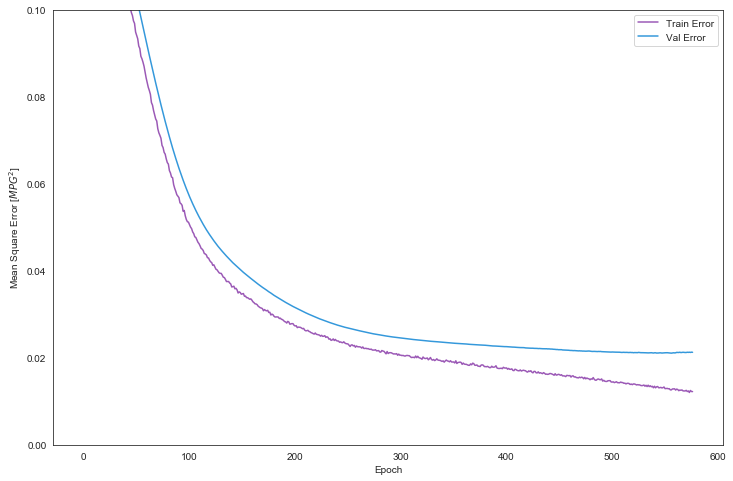

In [31]:
plot_history(keras_model)

In [39]:
# Predictions - convert dataframe to np.ndarray
test_data = test.values
test_predictions = model.predict(test_data).flatten() # Return a copy of the array collapsed into one dimension

In [38]:
model.predict(test_data).flatten()

array([124109.805, 151672.03 , 181711.52 , ..., 157723.47 , 119700.13 ,
       206732.95 ], dtype=float32)

## errors

training the model:

    InternalError: Blas GEMM launch failed : a.shape=(1168, 270), b.shape=(270, 1024), m=1168, n=1024, k=270
	 [[{{node dense/MatMul}}]]
	 [[{{node loss/mul}}]]

solution:
    
    Had the same error (Win10 using Keras and Visual Studio Code). Seems like TensorFlow was still active somehow even after terminating my script. Simply closing VS Code and restarting solved the issue.